In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import random

random.seed(95891)

In [2]:
data = pd.read_excel("hw2.xlsx")

In [3]:
sentimentArray = data['Sentiment'].values
positive = []
negative = []
for positive_negative in sentimentArray:
    p_n = positive_negative.split(" ")
    positive.append(int(p_n[0]))
    negative.append(int(p_n[1]))

In [4]:
data["Positive_sentiment"] = positive
data["Negative_sentiment"] = negative

In [5]:
#Impute all missing variables by mean.
mean_value_followers = data['#Followers'].mean() 
data['#Followers'].fillna(value=mean_value_followers, inplace=True) 
mean_value_friends = data['#Friends'].mean() 
data['#Friends'].fillna(value=mean_value_friends, inplace=True) 
mean_value_favorites = data['#Favorites'].mean() 
data['#Favorites'].fillna(value=mean_value_favorites, inplace=True) 
mean_value_retwees = data['#Retweets'].mean() 
data['#Retweets'].fillna(value=mean_value_retwees, inplace=True) 

In [6]:
log_followers = np.log10(data["#Followers"].values)
log_followers[log_followers < 0] = -1
log_friends = np.log10(data["#Friends"].values)
log_friends[log_friends < 0] = -1
log_favorites = np.log10(data["#Favorites"].values)
log_favorites[log_favorites < 0] = -1

C:\Users\JkL\AppData\Local\Temp\ipykernel_43284\3714335269.py:1: RuntimeWarning: divide by zero encountered in log10
  log_followers = np.log10(data["#Followers"].values)
C:\Users\JkL\AppData\Local\Temp\ipykernel_43284\3714335269.py:3: RuntimeWarning: divide by zero encountered in log10
  log_friends = np.log10(data["#Friends"].values)
C:\Users\JkL\AppData\Local\Temp\ipykernel_43284\3714335269.py:5: RuntimeWarning: divide by zero encountered in log10
  log_favorites = np.log10(data["#Favorites"].values)


C:\Users\JkL\AppData\Local\Temp\ipykernel_43284\2037707219.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


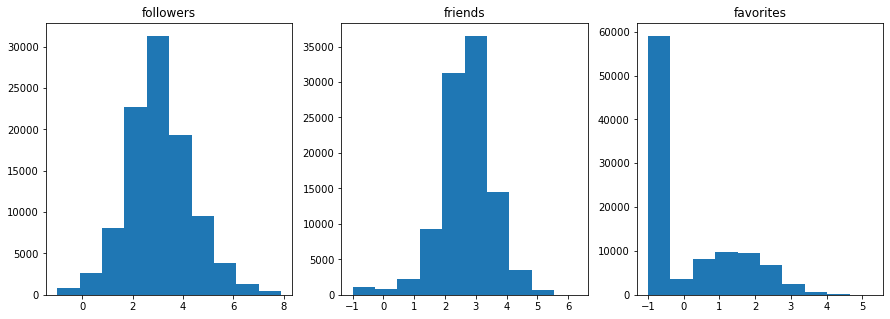

In [7]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,3,1)
plt.hist(log_followers) 
plt.title("followers") 
fig.add_subplot(1,3,2)
plt.hist(log_friends) 
plt.title("friends") 
fig.add_subplot(1,3,3)
plt.hist(log_favorites) 
plt.title("favorites")
fig.show()

In [8]:
my_array = np.array([4, 5, 5, 7, 8, 8, 9, 12])
my_array[my_array == 8] = 20

In [9]:
data.corr()["#Retweets"]

C:\Users\JkL\AppData\Local\Temp\ipykernel_43284\3471645240.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["#Retweets"]


Tweet ID              0.001213
#Followers            0.134503
#Friends              0.026502
#Retweets             1.000000
#Favorites            0.890328
Positive_sentiment    0.000433
Negative_sentiment   -0.010565
Name: #Retweets, dtype: float64

## I have imputed all 0 values to be -1 after taking the log. As shown in the histogram, all distributions seem like normal distributions. The correlation suggests that positive and negative sentiment show little linear relationship with the retweet variable, whereas favorites shows the most correlation. The plus and minus signs indicates whether the variable is positively correlated (x+, y+) or negatively correlated (x+, y-). If a feature shows correlation close to 0, it still can contribute to the prediction since some features relate to the outcome variable in a non-linear way.

In [10]:
# Count Entities, Hashtags, and Mentions

def count_words_entity(x):
    if str(x)=="null;":
        return 0
    else:
        return len(str(x).split(";"))

def count_words_others(x):
    if str(x)=="null;":
        return 0
    else:
        return len(str(x).split(" "))
    
entity = []
hashtags = []
mentions = []
for e in data["Entities"].values:
    entity.append(count_words_entity(e))
for h in data["Hashtags"].values:
    hashtags.append(count_words_others(h))
for m in data["Mentions"].values:
    mentions.append(count_words_others(m))
data["#Entity"] = entity
data["#Hashtags"] = hashtags
data["#Mentions"] = mentions

In [11]:
test = data.tail(20000)
train = data.head(80000)
feature_cols = ['#Followers', '#Friends', '#Favorites', '#Entity','#Mentions', '#Hashtags', "Positive_sentiment", "Negative_sentiment"]
X_train = train[feature_cols]
y_train = train["#Retweets"]
X_test= test[feature_cols]
y_test = test["#Retweets"]

In [12]:
from sklearn import tree

trees = tree.DecisionTreeClassifier()
trees.fit(X_train,y_train)
y_pred_trees = trees.predict(X_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_trees))
print("Error: ", metrics.mean_squared_error(y_test, y_pred_trees))
print("r2: ", metrics.r2_score(y_test, y_pred_trees))

Accuracy: 0.5735
Error:  135827.9917
r2:  -1.3510444353587503


In [14]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))
print("Error: ", metrics.mean_squared_error(y_test, y_pred_LR))
print("r2 ", metrics.r2_score(y_test, y_pred_LR))

Accuracy: 0.5542
Error:  554245.8877
r2  -8.593432795322379


In [16]:
test = data.tail(20000)
train = data.head(80000)
feature_cols = ['#Followers', '#Friends', '#Favorites']
X_train = train[feature_cols]
y_train = train["#Retweets"]
X_test= test[feature_cols]
y_test = test["#Retweets"]

In [17]:
from sklearn import tree

trees = tree.DecisionTreeClassifier()
trees.fit(X_train,y_train)
y_pred_trees = trees.predict(X_test)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_trees))
print("Error: ", metrics.mean_squared_error(y_test, y_pred_trees))
print("r2: ", metrics.r2_score(y_test, y_pred_trees))

Accuracy: 0.57745
Error:  54722.21875
r2:  0.05281403139032226


In [19]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))
print("Error: ", metrics.mean_squared_error(y_test, y_pred_LR))
print("r2 ", metrics.r2_score(y_test, y_pred_LR))

Accuracy: 0.55325
Error:  1184073.153
r2  -19.49510239072717


## I used Decision Tree and Logistic Regression as my models. When including (#Followers, #Friends, #Favorites, #Entity, #Mentions, #Hashtags, Positive_sentiment, Negative_sentiment) as my training variables, the error and r-square score are not ideal for both models. However, the decision tree does show a better accuracy, error, r square, and run time. When including only (#Followers, #Friends, #Favorites) as training variables, the result for decision tree is much better, but the result for logistic regression becomes worse. Decision tree appears to be the superior model in both cases.